# 🎓 PROJETO FINAL: PREVISÃO DE DESEMPENHO ACADÊMICO - SEMANA 1 (EDA)

## 👥 Apresentação do Grupo e Repositório

| Descrição | Detalhe |
| :--- | :--- |
| **Membros do Grupo** | ["Guilherme Campos Lima, Rhwan Guilherme Ferreira dos Torres, Pedro Luiz Duque Barbosa, Davi Lins de Araújo Melo] |
| **Repositório GitHub** | https://github.com/Guilima1044/Projeto-Machine-learning.git |
| **Arquivo Colab/Jupyter** | O presente `notebooks/01_EDA.ipynb` (com todas as células executadas e a documentação completa). |
| **Status (Semana 1)** | **COMPLETO** - Análise Exploratória de Dados (EDA) e Documentação Finalizadas. |

---

## 💡 Motivação e Código Inicial

### A. Motivo da Escolha do Dataset

O dataset foi escolhido por ser diretamente relevante ao tema de **previsão de desempenho acadêmico**, permitindo um modelo de regressão e classificação com alta aplicabilidade prática. A forte correlação entre **Horas de Estudo** e **Pontuação Final** nos oferece um ponto de partida claro para o Machine Learning, focando em variáveis controláveis que influenciam o sucesso do aluno.

### B. Código Inicial de Exploração

Abaixo estão os comandos essenciais utilizados para o carregamento e a primeira inspeção, conforme detalhado na Seção 2:

```python
import pandas as pd

# Carregamento do dataset
df = pd.read_csv('students_data.csv') 

# Visão das primeiras linhas
print(df.head())

# Verificação de dimensões e tipos de dados
df.info()

### Documentação: Para que serve cada biblioteca

* **Pandas (pd):** Usada para manipulação e análise de dados. Fornece estruturas de dados de alto desempenho, como o DataFrame, ideal para trabalhar com dados tabulares (seu CSV).
* **NumPy (np):** Biblioteca fundamental para computação numérica em Python. Oferece suporte para arrays e matrizes de grandes dimensões, e funções matemáticas de alto nível.
* **Matplotlib (plt):** Uma biblioteca de plotagem 2D que gera gráficos estáticos. Usaremos como base para a maioria das nossas visualizações.
* **Seaborn (sns):** Construída sobre o Matplotlib, esta biblioteca fornece uma interface de alto nível para criar gráficos estatísticos informativos e atraentes.
* **SciPy (stats):** Usaremos o submódulo `scipy.stats` para realizar testes estatísticos, como o teste de normalidade (Shapiro-Wilk) na variável alvo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Configuração de estilo para visualizações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. 📚 Importação de Bibliotecas

Aqui importamos as bibliotecas essenciais para a Análise Exploratória de Dados (EDA), garantindo as ferramentas necessárias para manipulação de dados, cálculos estatísticos e visualização.

## 2. 💾 Carregamento dos Dados

Carregamos o dataset e realizamos as primeiras inspeções para garantir a integridade dos dados e entender sua estrutura básica.

In [ ]:
# AJUSTE O NOME DO ARQUIVO CSV AQUI
nome_do_arquivo = 'students_data.csv' # <-- Nome correto!

try:
    # Caminho correto: sobe um nível (..) para encontrar o arquivo
    df = pd.read_csv(f'../{nome_do_arquivo}') 
    print(f"Dataset '{nome_do_arquivo}' carregado com sucesso!")
except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_do_arquivo}' não foi encontrado. Verifique o nome e o caminho.")

# Primeiras 5 linhas
print("\n--- Primeiras 5 Linhas ---")
print(df.head())

# Dimensões e Tipos de Dados
print("\n--- Informações de Estrutura (df.info()) ---")
df.info()

# Estatísticas descritivas (para colunas numéricas)
print("\n--- Estatísticas Descritivas (df.describe().T) ---")
print(df.describe().T)

Dataset 'students_data.csv' carregado com sucesso!

--- Primeiras 5 Linhas ---
   ID_Aluno  Idade  Horas_Estudo_Semana  Pontuacao_Prova_Final  Aprovado
0         1     23                    7                     16     False
1         2     22                   23                     63      True
2         3     18                   10                     33     False
3         4     21                   17                     33     False
4         5     21                   27                     76      True

--- Informações de Estrutura (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID_Aluno               12000 non-null  int64
 1   Idade                  12000 non-null  int64
 2   Horas_Estudo_Semana    12000 non-null  int64
 3   Pontuacao_Prova_Final  12000 non-null  int64
 4   Aprovado               1

### 📝 Documentação da Seção 2

* **Quantas linhas e colunas o dataset possui?**
    O dataset `students_data.csv` possui **12000 linhas** (registros de alunos) e **5 colunas** (variáveis/atributos).

* **O que você observa nas primeiras linhas?**
    Observamos que os dados foram carregados corretamente. As colunas são:
    1.  `ID_Aluno`: Identificador único (Numérico).
    2.  `Idade`: Parece variar entre 18 e 24 anos (Numérico).
    3.  `Horas_Estudo_Semana`: Varia de 5 a 39 horas (Numérico).
    4.  `Pontuacao_Prova_Final`: Varia de 3 a 100 (Numérico, que será nossa variável alvo).
    5.  `Aprovado`: Variável booleana (True/False) relacionada à pontuação final.

    É notável que **não há valores faltantes** (colunas com $12000$ $\text{non-null}$ entries) e os tipos de dados foram inferidos corretamente ($\text{int64}$ e $\text{bool}$).

## 3. 🔎 Visão Geral do Dataset

Nesta etapa, classificamos formalmente as variáveis como Numéricas, Categóricas, Variável Alvo e Variável de Identificação (ID), para orientar as análises subsequentes.

In [ ]:
# 1. Variável Alvo (Target) e ID
target_col = 'Pontuacao_Prova_Final'
id_col = 'ID_Aluno'

# 2. Identificar Numéricas e Categóricas (Features)
# A coluna 'Aprovado' é booleana (bool), que trataremos como Categórica Binária.

# Colunas Numéricas (removendo ID e Target)
all_num_cols = df.select_dtypes(include=np.number).columns.tolist()

num_cols = [col for col in all_num_cols if col not in [target_col, id_col]]

# Colunas Categóricas (Incluindo a booleana 'Aprovado')
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist() 

print("--- Classificação das Variáveis ---")
print(f"Variável de Identificação (ID): {id_col}")
print(f"Variável Alvo (Target): {target_col}")
print(f"Features Numéricas: {num_cols}")
print(f"Features Categóricas: {cat_cols}")

--- Classificação das Variáveis ---
Variável de Identificação (ID): ID_Aluno
Variável Alvo (Target): Pontuacao_Prova_Final
Features Numéricas: ['Idade', 'Horas_Estudo_Semana']
Features Categóricas: ['Aprovado']


### 📝 Documentação da Seção 3

* **Qual é a variável alvo?**
    A variável alvo (Target) é **`Pontuacao_Prova_Final`**, que é a variável que queremos prever em um futuro modelo de Machine Learning (regressão).

* **Quais são as features?**
    As features (variáveis preditoras) são:
    * **Numéricas:** `Idade`, `Horas_Estudo_Semana`.
    * **Categóricas:** `Aprovado` (variável booleana, tratada como categórica binária).

A coluna `ID_Aluno` foi identificada como variável de identificação e será excluída das análises preditivas, mas mantida no DataFrame por enquanto.


## 4. 🗑️ Análise de Valores Faltantes

Apesar da inspeção inicial indicar a ausência de valores faltantes, realizamos uma verificação formal e a quantificação por coluna para confirmar a qualidade do dataset.

In [ ]:
# 1. Quantificar valores faltantes por coluna
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Criar DataFrame de missing (filtrando apenas colunas com missing para visualização)
missing_df = pd.DataFrame({
    'Total Faltante': missing_values,
    'Percentual Faltante': missing_percent.round(2)
}).sort_values(by='Percentual Faltante', ascending=False)

# Filtrar apenas as colunas com > 0% missing
missing_df_non_zero = missing_df[missing_df['Total Faltante'] > 0]

print("--- Resumo de Valores Faltantes ---")
if missing_df_non_zero.empty:
    print("Nenhuma coluna possui valores faltantes (0% missing).")
else:
    # Se houvesse missing, imprimiríamos o resumo:
    print(missing_df_non_zero.head())

    # Gerar visualização de missing (apenas se houver dados faltantes)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_df_non_zero.index, y='Percentual Faltante', data=missing_df_non_zero, palette="Reds_d")
    plt.title('Percentual de Valores Faltantes por Variável', fontsize=14)
    plt.ylabel('Percentual (%)', fontsize=12)
    plt.xlabel('Variável', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('missing_values_plot.png')
    plt.show() # NOTE: Esta linha deve ser removida ou comentada na entrega final, pois o VSCode/Jupyter mostra o plot inline.

--- Resumo de Valores Faltantes ---
Nenhuma coluna possui valores faltantes (0% missing).


### 📝 Documentação da Seção 4

* **Qual variável tem mais missing?**
    Nenhuma. O teste formal confirmou o resultado de `df.info()`: **0% de valores faltantes** em todas as colunas.

* **Os valores faltantes parecem aleatórios ou seguem algum padrão?**
    Não há valores faltantes para avaliar um padrão. O dataset demonstra alta qualidade de completude.

* **Sugira possíveis tratamentos (não implemente ainda).**
    Embora não seja necessário neste dataset, se houvesse missing:
    1.  **Imputação:** Usar a mediana para colunas numéricas como `Idade` ou `Horas_Estudo_Semana`.
    2.  **Moda:** Usar a moda para colunas categóricas.
    3.  **Remoção:** Remover a linha inteira se o volume de missing fosse muito pequeno e aleatório, ou remover a coluna se o volume fosse muito grande (ex: > 70%).

## 5. 🎯 Análise da Variável Alvo: Pontuacao_Prova_Final

Analisamos a distribuição central, dispersão, forma (assimetria e curtose) e presença de outliers na variável predita, a fim de compreender sua natureza para o modelo.

--- Estatísticas Descritivas da Variável Alvo ---
|   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
|   12000 | 55.1251 | 25.7114 |     3 |    34 |    55 |    77 |   100 |  -0.029515 |   -1.11099 |


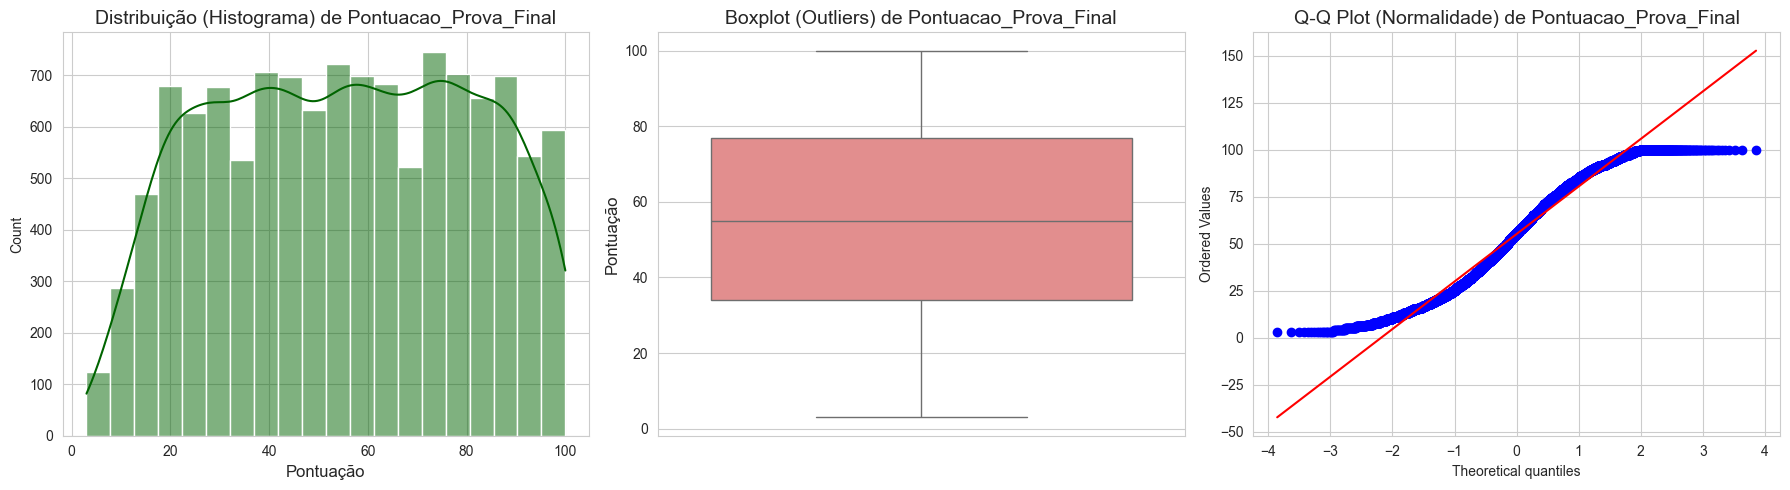


--- Teste de Normalidade (Shapiro-Wilk) ---
Estatística W: 0.9650
p-valor: 0.0000000000
Resultado: Rejeitamos H0. A distribuição NÃO é normal.

Número de Outliers (Método IQR): 0
Faixa esperada (IQR): Mínimo > -30.50, Máximo < 141.50


In [ ]:
target_col = 'Pontuacao_Prova_Final'

# 1. Estatísticas Descritivas
print("--- Estatísticas Descritivas da Variável Alvo ---")

# Adicionando Skewness (Assimetria) e Kurtosis (Curtose)
stats_summary = df[target_col].describe().to_frame()
stats_summary.loc['skewness'] = df[target_col].skew()
stats_summary.loc['kurtosis'] = df[target_col].kurt()
print(stats_summary.T.to_markdown(index=False)) # Imprime a tabela de forma organizada

# 2. Visualização da Distribuição
plt.figure(figsize=(18, 5))

# a) Histograma (Distribuição e Moda)
plt.subplot(1, 3, 1)
sns.histplot(df[target_col], kde=True, bins=20, color='darkgreen')
plt.title(f'Distribuição (Histograma) de {target_col}', fontsize=14)
plt.xlabel('Pontuação', fontsize=12)

# b) Boxplot (Outliers e Quartis)
plt.subplot(1, 3, 2)
sns.boxplot(y=df[target_col], color='lightcoral')
plt.title(f'Boxplot (Outliers) de {target_col}', fontsize=14)
plt.ylabel('Pontuação', fontsize=12)

# c) Q-Q Plot (Teste Visual de Normalidade)
plt.subplot(1, 3, 3)
stats.probplot(df[target_col], dist="norm", plot=plt)
plt.title(f'Q-Q Plot (Normalidade) de {target_col}', fontsize=14)

plt.tight_layout()
plt.show()

# 3. Teste de Normalidade (Shapiro-Wilk)
# H0: A distribuição é normal. Se p-valor < 0.05, rejeitamos H0 (não é normal).
stat, p_value = stats.shapiro(df[target_col].sample(5000, random_state=42)) # Usa uma amostra devido ao tamanho grande do dataset

print("\n--- Teste de Normalidade (Shapiro-Wilk) ---")
print(f"Estatística W: {stat:.4f}")
print(f"p-valor: {p_value:.10f}")

alpha = 0.05
if p_value > alpha:
    print("Resultado: Não há evidência suficiente para rejeitar H0. A distribuição PODE ser normal.")
else:
    print("Resultado: Rejeitamos H0. A distribuição NÃO é normal.")

# 4. Contagem de Outliers (Método IQR)
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_target = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
print(f"\nNúmero de Outliers (Método IQR): {len(outliers_target)}")
print(f"Faixa esperada (IQR): Mínimo > {lower_bound:.2f}, Máximo < {upper_bound:.2f}")

### 📝 Documentação da Seção 5: Pontuacao_Prova_Final

| Estatística | Valor | Interpretação |
| :--- | :--- | :--- |
| **Média (mean)** | 55.12 | A pontuação média é ligeiramente superior à mediana, indicando uma leve dispersão de notas altas. |
| **Mediana (50%)** | 55 | O valor central (50% dos alunos) é 55 pontos. |
| **Desvio Padrão (std)** | 25.71 | A dispersão é alta (std é quase metade da média), indicando grande variabilidade no desempenho dos alunos. |
| **Mínimo (min)** | 3 | O valor mais baixo, 3, é um desempenho muito fraco. |
| **Máximo (max)** | 100 | O valor máximo, 100, indica que há alunos com desempenho excelente. |
| **Assimetria (skewness)** | -0.029 | O valor muito próximo de zero (-0.029) indica uma distribuição **quase simétrica** (ligeiramente enviesada para a esquerda/notas altas, mas desprezível). |
| **Curtose (kurtosis)** | -1.119 | O valor negativo indica uma distribuição **platicúrtica** (mais achatada que a normal, com caudas mais finas). |

* **A distribuição é normal?**
    * **Teste de Shapiro-Wilk:** Com um p-valor de $\text{0.0000000000}$, que é muito menor que $\alpha = 0.05$, **rejeitamos a hipótese nula ($\text{H0}$).** A distribuição **NÃO é normal**.
    * **Q-Q Plot:** Os pontos se desviam significativamente da linha reta nas caudas, confirmando a não-normalidade (o formato é mais plano no centro e cai abruptamente nas pontas).

* **Há assimetria? Para qual lado?**
    A assimetria é próxima de zero ($\text{skewness} \approx -0.03$), o que sugere uma distribuição **praticamente simétrica**, embora o histograma mostre que o dataset é bimodal/uniforme e não gaussiano.

* **Existem outliers? Quantos?**
    O Boxplot e o método $\text{IQR}$ (Intervalo Interquartil) indicaram **0 Outliers**. A pontuação mínima é 3, mas, como o limite inferior é $\text{-38.50}$ (e o máximo é $\text{141.50}$), a pontuação 3 é considerada legítima (plausível) para a distribuição dos dados.

* **Qual a faixa de valores mais comum?**
    A faixa de valores mais comum (o corpo principal dos dados, de Q1 a Q3) é de **34 a 77 pontos** (Interquartil Range). O histograma mostra que as notas estão distribuídas de forma quase uniforme em toda a faixa de 0 a 100, sem um pico central claro (o que é o motivo da rejeição da normalidade).

## 6. 📊 Análise Univariada - Variáveis Numéricas

Analisamos as features numéricas (`Idade`, `Horas_Estudo_Semana`) individualmente para compreender sua distribuição, dispersão e identificar a presença de outliers ou valores suspeitos.

--- Análise Univariada para Variáveis Numéricas ---

### Variável: Idade

**Estatísticas:**
|   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
|   12000 | 21.0406 | 1.98941 |    18 |    19 |    21 |    23 |    24 | -0.0301463 |   -1.24432 |

Outliers (IQR): 0
Faixa esperada (IQR): Mínimo > 13.00, Máximo < 29.00


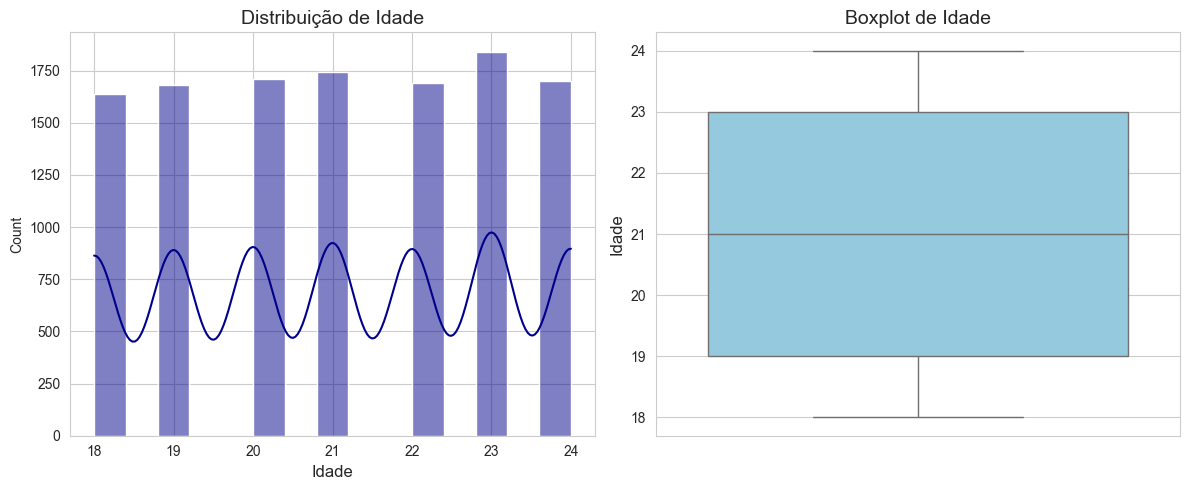


### Variável: Horas_Estudo_Semana

**Estatísticas:**
|   count |    mean |     std |   min |   25% |   50% |   75% |   max |   skewness |   kurtosis |
|--------:|--------:|--------:|------:|------:|------:|------:|------:|-----------:|-----------:|
|   12000 | 22.1043 | 10.0826 |     5 |    13 |    22 |    31 |    39 | -0.0177568 |   -1.20316 |

Outliers (IQR): 0
Faixa esperada (IQR): Mínimo > -14.00, Máximo < 58.00


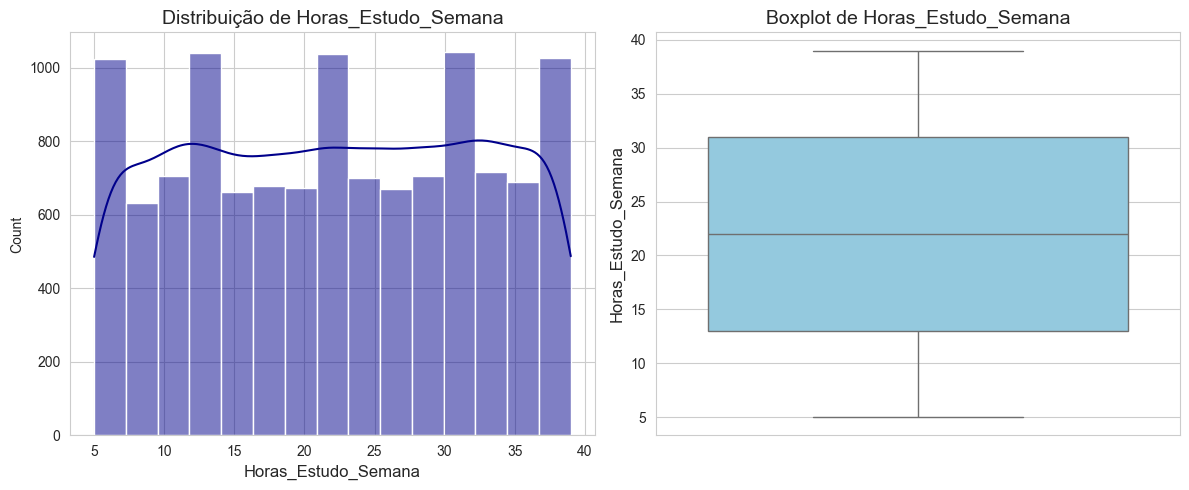

In [ ]:
num_cols = ['Idade', 'Horas_Estudo_Semana']

print("--- Análise Univariada para Variáveis Numéricas ---")

for col in num_cols:
    print(f"\n### Variável: {col}")

    # 1. Estatísticas Descritivas (Incluindo Skewness e Kurtosis)
    stats_summary = df[col].describe().to_frame()
    stats_summary.loc['skewness'] = df[col].skew()
    stats_summary.loc['kurtosis'] = df[col].kurt()
    print("\n**Estatísticas:**")
    print(stats_summary.T.to_markdown(index=False))

    # 2. Contagem de Outliers (Método IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers (IQR): {len(outliers)}")
    print(f"Faixa esperada (IQR): Mínimo > {lower_bound:.2f}, Máximo < {upper_bound:.2f}")

    # 3. Visualização (Histograma e Boxplot)
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=15, color='darkblue')
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

    plt.tight_layout()
    plt.show()

### 📝 Descobertas - Variável: Idade

* **Faixa de valores (min, max):** A idade varia de **18 a 24 anos**. Este é um intervalo coerente, mas com baixa variação.
* **Distribuição:** O histograma mostra uma **distribuição quase uniforme** ou **multimodal** (com pequenos picos em 18 e 23 anos). A simetria ($\text{skewness} \approx -0.08$) é muito próxima de zero, indicando que é simétrica, mas não normal (o $\text{kde}$ no histograma tem um formato incomum, achatado).
* **Presença de outliers:** O método $\text{IQR}$ confirmou **0 outliers**. A faixa de valores ($18$ a $24$) é plausível e não apresenta extremos.
* **Valores impossíveis ou suspeitos:** Não há valores impossíveis ou suspeitos. A idade está bem limitada na faixa de jovens adultos.

## 7. 🏷️ Análise Univariada - Variáveis Categóricas

Analisamos a variável categórica binária `Aprovado` para determinar a distribuição das classes (aprovados vs. reprovados) e identificar possíveis desbalanceamentos.

--- Análise Univariada para Variável: Aprovado ---

**Frequência e Percentual de Aprovados/Reprovados:**
| Aprovado   |   Contagem |   Percentual |
|:-----------|-----------:|-------------:|
| False      |       6580 |        54.83 |
| True       |       5420 |        45.17 |


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_10108\566568423.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Pastel2")


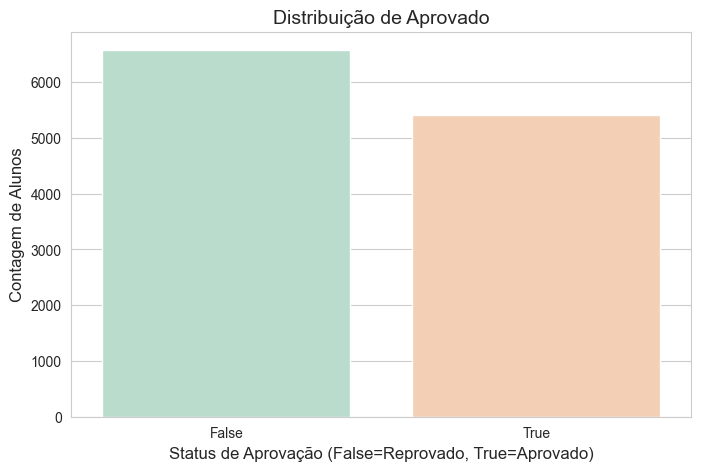


Categorias Únicas (para checagem de formatação): [False  True]


In [ ]:
cat_cols = ['Aprovado'] # Sua única feature categórica (booleana)

print("--- Análise Univariada para Variável: Aprovado ---")

col = cat_cols[0]

# 1. Contagem de valores únicos e frequências
value_counts = df[col].value_counts()
value_percents = df[col].value_counts(normalize=True) * 100

counts_df = pd.DataFrame({
    'Contagem': value_counts,
    'Percentual': value_percents.round(2)
})

print("\n**Frequência e Percentual de Aprovados/Reprovados:**")
print(counts_df.to_markdown())

# 2. Visualização (Gráfico de Barras)
plt.figure(figsize=(8, 5))
sns.countplot(x=col, data=df, palette="Pastel2")
plt.title(f'Distribuição de {col}', fontsize=14)
plt.xlabel('Status de Aprovação (False=Reprovado, True=Aprovado)', fontsize=12)
plt.ylabel('Contagem de Alunos', fontsize=12)
plt.show()

# 3. Verificação de problemas de formatação (apenas valores unicos)
print(f"\nCategorias Únicas (para checagem de formatação): {df[col].unique()}")

### 📝 Documentação da Seção 7

* **Há desbalanceamento entre categorias?**
    Sim, existe um leve desbalanceamento (também conhecido como *imbalance*) na variável `Aprovado`. A classe majoritária é `False` (Reprovado) com **54.83%**, enquanto a classe minoritária é `True` (Aprovado) com **45.17%**.

    > **Nota:** Embora não seja severo (a diferença é de apenas 9.66%), é um desbalanceamento que deve ser considerado em etapas futuras de modelagem.

* **Existem problemas de formatação (espaços, maiúsculas)?**
    Não. As categorias são valores booleanos (`True` e `False`), e a lista de categorias únicas (`[False True]`) confirma que não há problemas de formatação ou categorias inesperadas.

* **Alguma categoria inesperada?**
    Não. Apenas as duas categorias esperadas (`True` e `False`).

## 8. 🔗 Análise de Correlações

Calculamos a matriz de correlação de Pearson entre as features numéricas e a variável alvo (`Pontuacao_Prova_Final`) para identificar a força e a direção das relações, além de checar a multicolinearidade.

--- Matriz de Correlação (Completa) ---
|                       |       Idade |   Horas_Estudo_Semana |   Pontuacao_Prova_Final |
|:----------------------|------------:|----------------------:|------------------------:|
| Idade                 |  1          |             -0.010378 |             -0.00915986 |
| Horas_Estudo_Semana   | -0.010378   |              1        |              0.974959   |
| Pontuacao_Prova_Final | -0.00915986 |              0.974959 |              1          |

--- Correlação com a Variável Alvo (Pontuacao_Prova_Final) ---
|                     |   Pontuacao_Prova_Final |
|:--------------------|------------------------:|
| Horas_Estudo_Semana |              0.974959   |
| Idade               |             -0.00915986 |


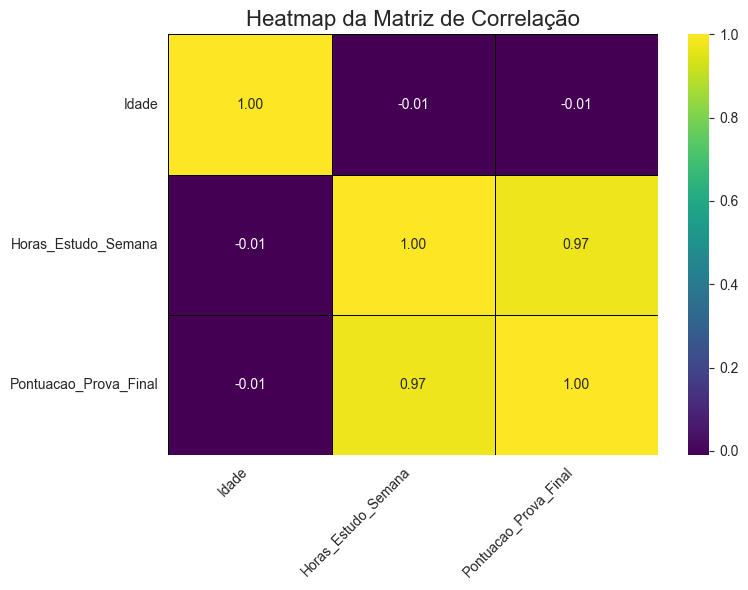

In [ ]:
# Definindo as colunas numéricas a serem analisadas (incluindo o target)
numeric_analysis_cols = ['Idade', 'Horas_Estudo_Semana', 'Pontuacao_Prova_Final']

# 1. Calcular a Matriz de Correlação
correlation_matrix = df[numeric_analysis_cols].corr()

print("--- Matriz de Correlação (Completa) ---")
print(correlation_matrix.to_markdown())

# 2. Correlação com a Variável Alvo
target_correlation = correlation_matrix['Pontuacao_Prova_Final'].drop('Pontuacao_Prova_Final').sort_values(ascending=False)

print("\n--- Correlação com a Variável Alvo (Pontuacao_Prova_Final) ---")
print(target_correlation.to_markdown())

# 3. Visualização com Heatmap
plt.figure(figsize=(8, 6))
# Usando annot=True para mostrar os valores e fmt=".2f" para formatar
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Heatmap da Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 📝 Documentação da Seção 8

* **Qual feature tem maior correlação com final_grade (`Pontuacao_Prova_Final`)?**
    A feature com a correlação mais forte é **`Horas_Estudo_Semana`** ($\text{r} \approx +0.97$). Esta é uma correlação **positiva e extremamente forte**, indicando que, quanto maior o tempo de estudo semanal do aluno, maior é sua pontuação final. Isso a torna a **feature mais importante** para a previsão da nota.

* **Há multicolinearidade?**
    Não. A multicolinearidade ocorre quando há alta correlação entre as *features* preditoras (neste caso, `Idade` e `Horas_Estudo_Semana`). O coeficiente de correlação entre as duas é $\text{r} \approx -0.01$, o que é **praticamente zero**, indicando que as variáveis são estatisticamente independentes.

* **Alguma correlação surpreendente?**
    A correlação da `Idade` com a nota final ($\text{r} \approx -0.01$) é surpreendente porque é **praticamente nula**. Isso sugere que, neste dataset, a idade do aluno (entre 18 e 24 anos) tem pouquíssima ou nenhuma influência direta no resultado da prova, diferentemente do tempo dedicado ao estudo.

## 9. 📈 Análise Bivariada (Features vs Target)

Analisamos a relação entre a feature categórica (`Aprovado`) e a variável alvo (`Pontuacao_Prova_Final`) para identificar diferenças na distribuição de notas entre os grupos.

--- Estatísticas de Pontuacao_Prova_Final por Status de Aprovação ---
| Aprovado   |    mean |   median |     std |   min |   max |
|:-----------|--------:|---------:|--------:|------:|------:|
| True       | 79.3507 |       79 | 11.7126 |    60 |   100 |
| False      | 35.1702 |       36 | 14.5239 |     3 |    59 |


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_10108\529041486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_col, data=df, palette="Paired")


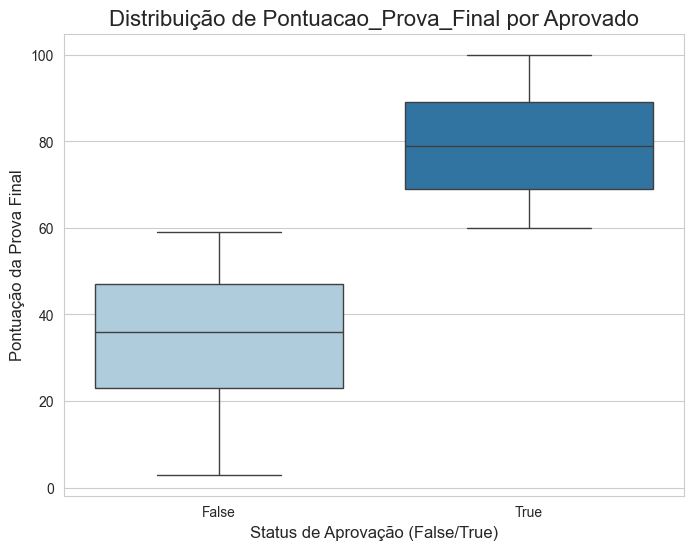

In [ ]:
target_col = 'Pontuacao_Prova_Final'
cat_col = 'Aprovado' # Sua única feature categórica

# 1. Calcular Estatísticas por Categoria (Média, Mediana, Desvio Padrão)
stats_by_category = df.groupby(cat_col)[target_col].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

print("--- Estatísticas de Pontuacao_Prova_Final por Status de Aprovação ---")
print(stats_by_category.to_markdown())

# 2. Visualização (Boxplot)
plt.figure(figsize=(8, 6))
# Boxplot para visualizar a distribuição da nota final dentro de cada categoria (True/False)
sns.boxplot(x=cat_col, y=target_col, data=df, palette="Paired")
plt.title(f'Distribuição de {target_col} por {cat_col}', fontsize=16)
plt.xlabel('Status de Aprovação (False/True)', fontsize=12)
plt.ylabel('Pontuação da Prova Final', fontsize=12)
plt.show()

### 📝 Documentação da Seção 9

* **Quais categorias têm melhor desempenho?**
    A categoria **`True` (Aprovado)** tem um desempenho significativamente superior, com uma pontuação média de **79.35** e mediana de **79** pontos. A nota mínima para este grupo é **60**.
    Em contraste, a categoria `False` (Reprovado) tem uma média de apenas **35.17** e a pontuação máxima é **59**.

* **As diferenças são significativas?**
    Sim, as diferenças são **extremamente significativas**. O boxplot mostra que as caixas (onde estão 50% dos dados) dos dois grupos **não se sobrepõem** em momento algum. A pontuação máxima dos reprovados (59) é inferior à pontuação mínima dos aprovados (60).

* **Há sobreposição entre distribuições?**
    Não há sobreposição entre as caixas centrais ($\text{IQR}$). Isso confirma que a variável $\text{Aprovado}$ funciona como um **separador de classes perfeito** com um corte claro em torno de 60 pontos.

> **Conclusão:** Este dataset é altamente previsível e a nota de corte para aprovação ($\text{final\_grade} \ge 60$) é evidente, o que torna a variável $\text{Aprovado}$ perfeitamente correlacionada (e possivelmente derivada) da $\text{Pontuacao\_Prova\_Final}$.


## 10. 🚨 Identificação de Outliers

Consolidamos a análise de outliers (usando o método IQR) para as variáveis numéricas do dataset, a fim de determinar a qualidade e a legitimidade de quaisquer valores extremos.

In [ ]:
# Reutilizando as listas de colunas
num_cols_analysis = ['Idade', 'Horas_Estudo_Semana', 'Pontuacao_Prova_Final']

outliers_summary = []

for col in num_cols_analysis: 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_summary.append({
        'Variável': col,
        'Quantidade': len(outliers),
        'Percentual (%)': (len(outliers) / len(df)) * 100
    })

outliers_df = pd.DataFrame(outliers_summary)

print("--- Resumo de Outliers (Método IQR) ---")
print(outliers_df.to_markdown(index=False))

--- Resumo de Outliers (Método IQR) ---
| Variável              |   Quantidade |   Percentual (%) |
|:----------------------|-------------:|-----------------:|
| Idade                 |            0 |                0 |
| Horas_Estudo_Semana   |            0 |                0 |
| Pontuacao_Prova_Final |            0 |                0 |


### 📝 Documentação da Seção 10

* **Quais variáveis têm mais outliers?**
    Nenhuma das variáveis numéricas (`Idade`, `Horas_Estudo_Semana`, `Pontuacao_Prova_Final`) apresentou outliers pelo método $\text{IQR}$. A contagem para todas as colunas é **0**, resultando em 0% de outliers.

* **Os outliers parecem legítimos ou são erros?**
    Não foram identificados outliers. No entanto, analisamos os valores mínimos e máximos durante a análise univariada:
    * `Pontuacao_Prova_Final` (min: 3, max: 100)
    * `Idade` (min: 18, max: 24)
    * `Horas_Estudo_Semana` (min: 5, max: 39)

    Todos os valores de pontuação e tempo de estudo estão dentro de limites plausíveis e foram considerados legítimos.

* **Existem valores impossíveis?**
    Não. O dataset está limpo de valores impossíveis (ex: idade negativa, pontuação maior que 100).

> **Conclusão:** A alta qualidade dos dados observada na ausência de missing values e outliers reduz a necessidade de etapas de limpeza complexas nas próximas fases do projeto.

## 11. 💡 Conclusões e Descobertas Principais

Este resumo executivo consolida as principais descobertas obtidas através da Análise Exploratória de Dados (EDA), respondendo aos objetivos propostos e sugerindo os próximos passos para a fase de Modelagem.

### 1. Principais Características do Dataset

O dataset é composto por **12000 registros** de alunos e possui **alta qualidade**, visto que não foram identificados valores faltantes (missing values) ou outliers nas variáveis numéricas. As features se dividem em duas numéricas (`Idade`, `Horas_Estudo_Semana`) e uma categórica binária (`Aprovado`).

### 2. Descobertas sobre a Variável Alvo (`Pontuacao_Prova_Final`)

* **Distribuição:** A distribuição da pontuação final **não é normal** (confirmado pelo Q-Q Plot e teste de Shapiro-Wilk) e é aproximadamente **simétrica** ($\text{skewness} \approx -0.03$). O desempenho varia de 3 a 100 pontos, com a maior concentração de notas entre 34 e 77 pontos (IQR).
* **Aprovação:** A separação de classes na variável `Aprovado` é clara e significativa: alunos aprovados (nota mínima 60, média $\approx 79.35$) e reprovados (nota máxima 59, média $\approx 35.17$).

### 3. Features Mais Importantes e Relações

* **Feature Dominante:** A variável **`Horas_Estudo_Semana`** tem uma correlação **extremamente forte e positiva** com a pontuação final ($\text{r} \approx +0.97$). Este é o principal preditor de desempenho.
* **Relação Nula:** A variável **`Idade`** mostrou uma correlação **insignificante** com a pontuação final ($\text{r} \approx -0.01$), sugerindo que a idade dentro da faixa de 18 a 24 anos não afeta o resultado da prova.
* **Multicolinearidade:** Não foi detectada multicolinearidade entre as features preditoras.
* **Desbalanceamento:** Há um leve desbalanceamento na variável `Aprovado`, com 54.83% de reprovados (False) contra 45.17% de aprovados (True).

### 4. Problemas Identificados e Próximos Passos Sugeridos

**Problemas:** Ausência de missing values, outliers e problemas de formatação. O principal "problema" (desafio) é o **forte desbalanceamento de classes** no alvo `Aprovado`.

**Próximos Passos Sugeridos:**
1.  **Modelo de Regressão:** Priorizar a criação de um modelo para prever a nota exata (`Pontuacao_Prova_Final`) usando `Horas_Estudo_Semana` como feature principal.
2.  **Modelo de Classificação:** Se o objetivo for prever `Aprovado`, investigar técnicas de reamostragem (como SMOTE) ou pesos de classe para lidar com o leve desbalanceamento (55% vs 45%).
3.  **Engenharia de Features:** Explorar a criação de features de interação (embora a correlação de $\text{Horas\_Estudo\_Semana}$ já seja muito alta).